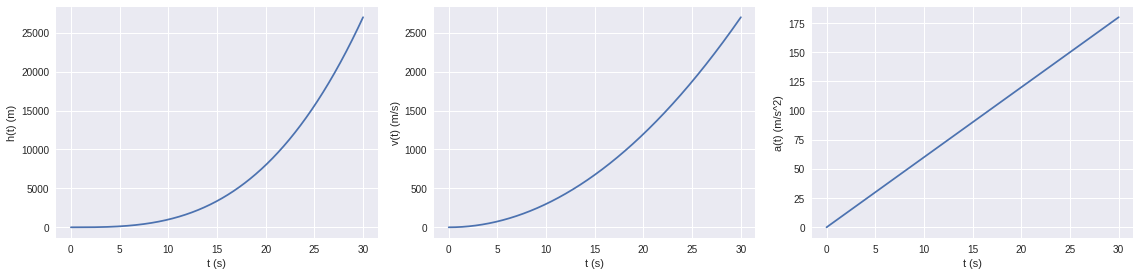

In [44]:
states = []

states.append({"y": 0, "v": 0, "a": 0})
#states.append({"y": 0, "v": 0, "a": 6})
#states.append({"y": 0, "v": 6, "a": 12})
#states.append({"y": 6, "v": 18, "a": 18})
#states.append({"y": 24, "v": 36, "a": 24})

#for t in range(0, len(states)):
#  print(states[t]["a"])


dt = 0.001
time = 30
max_time = int(time / dt)

t = [i*dt for i in range(0, max_time)]
  
def next_state(current_state):
  return {
    "y": current_state["y"] + current_state["v"]*dt, 
    "v": current_state["v"] + current_state["a"]*dt, 
    "a": current_state["a"] + 6*dt
  }

for i in range(0, max_time):
  states.append(next_state(states[-1]))

#for i in range(0, len(states)):
#  print(states[i]["a"])

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
    
ax1.plot(t, [states[i]["y"] for i in range(0, max_time)])
ax1.set_xlabel("t (s)")
ax1.set_ylabel("h(t) (m)")

ax2.plot(t, [states[i]["v"] for i in range(0, max_time)])
ax2.set_xlabel("t (s)")
ax2.set_ylabel("v(t) (m/s)")

ax3.plot(t, [states[i]["a"] for i in range(0, max_time)])
ax3.set_xlabel("t (s)")
ax3.set_ylabel("a(t) (m/s^2)")

fig = plt.gcf()
fig.set_size_inches(16, 4)
fig.tight_layout()

plt.show()

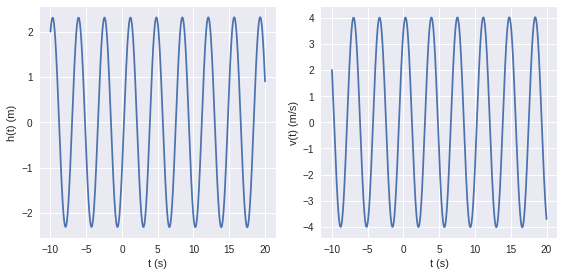

In [41]:
import matplotlib.pyplot as plt
from math import sqrt

dt = 0.0001
time = 30
max_time = int(time / dt)
k  = 3
m  = 1
om = sqrt(3/1)

def init_state():
  #return {"x": 0, "v": 0, "t": 0}
  #return {"x": 2, "v": 0, "t": 0}
  #return {"x": 0, "v": 2, "t": 0}
  return {"x": 2, "v": 2, "t": -10}

def next_state(current_state, om):
  return {
    "x": current_state["x"] + current_state["v"]*dt, 
    "v": current_state["v"] - om**2*current_state["x"]*dt, 
    "t": current_state["t"] + dt
  }

def next_state(current_state, om):
  return {
    "x": current_state["x"] + rate(current_state)["x"]*dt, 
    "v": current_state["v"] + rate(current_state)["v"]*dt, 
    "t": current_state["t"] + rate(current_state)["t"]*dt
  }

def rate(current_state):
  return {
    "x": current_state["v"], 
    "v": -om**2*current_state["x"], 
    "t": 1
  }

states = []

states.append(init_state())
for i in range(0, max_time):
  states.append(next_state(states[-1], om))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
    
ax1.plot(
    [states[i]["t"] for i in range(0, max_time)], 
    [states[i]["x"] for i in range(0, max_time)]
)
ax1.set_xlabel("t (s)")
ax1.set_ylabel("h(t) (m)")

ax2.plot(
    [states[i]["t"] for i in range(0, max_time)], 
    [states[i]["v"] for i in range(0, max_time)]
)
ax2.set_xlabel("t (s)")
ax2.set_ylabel("v(t) (m/s)")

fig = plt.gcf()
fig.set_size_inches(8, 4)
fig.tight_layout()

plt.show()